### 당뇨병 데이터 셋 - 다중회귀
<조건> 
1) test size = 0.1
2) LinearRegression Vs DecisionTreeRegressor
3) 1.2번 model 성능 평가 (MSE,score)

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [51]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [52]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [53]:
df.shape

(442, 10)

In [54]:
features = df.columns[1:-1]
print(features)

Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], dtype='object')


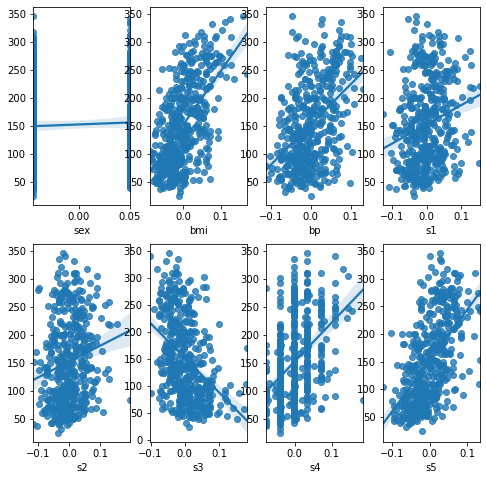

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8,8))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y=diabetes.target, data=df, ax=axs[row][col])

In [55]:
X = diabetes.data
y = diabetes.target

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=2021
)

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
lr.score(X, y)

0.5169647881880264

In [60]:
dtc.score(X, y)

0.880685650009904

In [62]:
pred = lr.predict(X_test)

In [63]:
pred2 = dtc.predict(X_test)

In [70]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    dtc = DecisionTreeRegressor()
    dtc.fit(X, y)
    r2 = dtc.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.1409
sex:	0.0019
bmi:	0.5809
bp:	0.3705
s1:	0.3417
s2:	0.7229
s3:	0.2702
s4:	0.3119
s5:	0.5953
s6:	0.2677


In [71]:
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.4558401786089106

In [67]:
r2_score(y_test, pred2)

-0.5954770678897852

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

2370.1978745563165

In [69]:
mse2 = mean_squared_error(y_test, pred2)
mse2

6949.422222222222